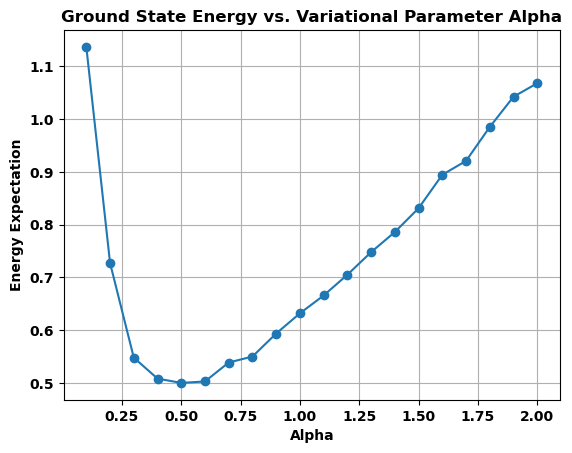

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trial_wavefunction(x, alpha):
    return np.exp(-alpha * x**2)

def local_energy(x, alpha):
    return alpha + x**2 * (0.5 - 2 * alpha**2)

def metropolis(x, alpha, delta):
    xt = x + delta * (2 * np.random.rand() - 1)
    omega = np.exp(-2 * alpha * (xt**2 - x**2))
    beta = np.random.rand()
    if omega > beta:
        return xt, local_energy(xt, alpha)
    else:
        return x, local_energy(x, alpha)

def quantum_monte_carlo(alpha, delta, num_samples, num_steps):
    x = 0.0
    sum_expectation = 0.0

    for _ in range(num_samples):
        expectation_values = []
        for _ in range(num_steps):
            x, local_energy_val = metropolis(x, alpha, delta)
            expectation_values.append(local_energy_val)
        sum_expectation += np.mean(expectation_values)

    energy_expectation = sum_expectation / num_samples

    return energy_expectation

def main():
    alpha = 2
    delta = 0.1
    num_samples = 1000
    num_steps = 1000

    alpha_values = []
    energy_values = []

    for _ in range(20):
        energy_expectation = quantum_monte_carlo(alpha, delta, num_samples, num_steps)
        alpha_values.append(alpha)
        energy_values.append(energy_expectation)
        alpha -= 0.1

    plt.plot(alpha_values, energy_values, marker='o')
    plt.title('Ground State Energy vs. Variational Parameter Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Energy Expectation')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


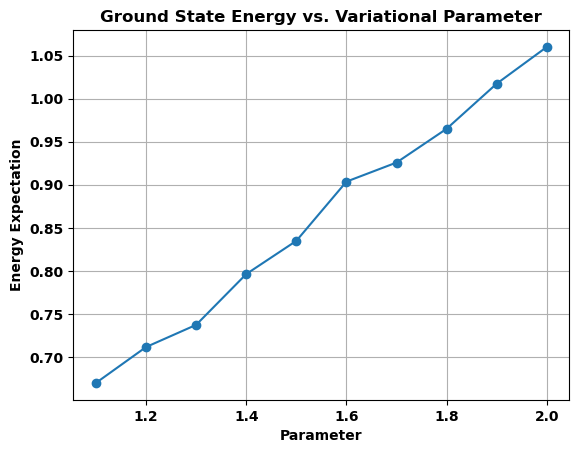

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def trial_wavefunction(x, param):
    return np.exp(-param * x**2)

def local_energy(x, param):
    return param + x**2 * (0.5 - 2 * param**2)

def metropolis(x, param, delta):
    xt = x + delta * (2 * np.random.rand() - 1)
    omega = np.exp(-2 * param * (xt**2 - x**2))
    beta = np.random.rand()
    if omega > beta:
        return xt, local_energy(xt, param)
    else:
        return x, local_energy(x, param)

def quantum_monte_carlo(param, delta, num_samples, num_steps):
    x = 0.0
    sum_expectation = 0.0

    for _ in range(num_samples):
        expectation_values = []
        for _ in range(num_steps):
            x, local_energy_val = metropolis(x, param, delta)
            expectation_values.append(local_energy_val)
        sum_expectation += np.mean(expectation_values)

    energy_expectation = sum_expectation / num_samples

    return energy_expectation

alpha_values = np.arange(2, 1, -0.1)
step_size = 0.1
num_samples = 1000
num_steps = 1000

energy_values = [quantum_monte_carlo(param, step_size, num_samples, num_steps) for param in alpha_values]

plt.plot(alpha_values, energy_values, marker='o')
plt.title('Ground State Energy vs. Variational Parameter')
plt.xlabel('Parameter')
plt.ylabel('Energy Expectation')
plt.grid(True)
plt.show()
